In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# gradient

# Decision tree model

In dit gedeelte wordt een decision tree model gemaakt. Allereerst moeten we weten wat een decision tree model is, en hoe het werkt. Een decision tree model is een vorm van supervised machine learning. In dit geval wordt een decision tree classifier gebruikt omdat dit een classificatie probleem is. Het werkt door de dataset recursief te verdelen in "vertakkingen" op basis van de waarden van de invoerfuncties. Deze splitsingen creëren een structuur die op een boom lijkt, waarbij elke vertakking een beslissing of een test op een kenmerk vertegenwoordigt. En op die gesplitste data wordt weer een beslissing genomen, en zo vertakt het model tot we bij de "bladeren" komen. En net zoals bij een boom, noemen we de eerste splitsing de "wortel", en eindigen we bij het blad. Na het blad stopt het model met splitsen. (presentaties lessen, datacamp)

Criteria

TOEVOEGEN: criteria

hyperparameters

pruning + uitleg

boom plaatje

In [3]:
data_test = pd.read_csv('test_c.csv', sep = ',')
data_train = pd.read_csv('train_c.csv', sep = ',')

In [4]:
# Aanmaken X_kolommen voor replace
X_kolommen = data_train.columns[:-1]

# Replace om NaN-waarden aan te maken
data_train[X_kolommen] = data_train[X_kolommen].replace(0, np.nan)

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def feature_scaling(data, method='min-max', columns=None):

    if method not in ['min-max', 'standardization']:
        raise ValueError("Unsupported scaling method. Choose 'min-max' or 'standardization'.")

    if columns is None:
        numerical_columns = data.select_dtypes(include=['number']).columns
    else:
        numerical_columns = columns

    if method == 'min-max':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()

    scaled_data = data.copy()
    scaled_data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    return scaled_data

In [6]:
# Weghalen rijen met nulwaarden
df_train = data_train.copy()
df_train.drop(df_train[df_train['BMI'] == 0].index, inplace=True)
df_train.drop(df_train[df_train['Glucose'] == 0].index, inplace=True)
df_train.drop(df_train[df_train['BloodPressure'] == 0].index, inplace=True)

# Weghalen van kolommen wegens te hoog aantal nulwaarden
df_train.drop('Insulin', axis=1, inplace=True)
df_train.drop('SkinThickness', axis=1, inplace=True)
df_train.describe()

,p_id,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,613.000000,521.000000,610.000000,583.000000,603.000000,614.000000,614.000000,614.000000
mean,386.171289,4.489443,121.255738,72.567753,32.512106,0.468096,33.265472,0.342020
std,221.768696,3.220783,30.531690,12.335730,6.960499,0.329203,11.851427,0.474773
min,2.000000,1.000000,56.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,195.000000,2.000000,99.000000,64.000000,27.600000,0.238000,24.000000,0.000000
50%,381.000000,4.000000,116.000000,72.000000,32.400000,0.365500,29.000000,0.000000
75%,584.000000,7.000000,140.750000,80.000000,36.600000,0.628500,41.000000,1.000000
max,767.000000,15.000000,197.000000,114.000000,67.100000,2.420000,72.000000,1.000000


In [7]:
# Aanmaken X_kolommen voor replace
X_kolommen = data_train.columns[:-1]

# Replace om NaN-waarden aan te maken
data_train[X_kolommen] = data_train[X_kolommen].replace(0, np.nan)

gem = df_train.mean()
df_train.fillna(gem, inplace=True)
df_train.describe()

,p_id,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,386.171289,4.489443,121.255738,72.567753,32.512106,0.468096,33.265472,0.342020
std,221.587734,2.966422,30.431913,12.019769,6.897764,0.329203,11.851427,0.474773
min,2.000000,1.000000,56.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,195.250000,2.000000,99.250000,64.000000,27.600000,0.238000,24.000000,0.000000
50%,381.500000,4.489443,116.000000,72.567753,32.400000,0.365500,29.000000,0.000000
75%,583.750000,6.000000,140.000000,80.000000,36.500000,0.628500,41.000000,1.000000
max,767.000000,15.000000,197.000000,114.000000,67.100000,2.420000,72.000000,1.000000


In [8]:
# Weghalen rijen met nulwaarden
df_test = data_test.copy()

# Aanmaken X_kolommen voor replace
X_kolommen = data_train.columns[:-1]

# Replace om NaN-waarden aan te maken
data_test[X_kolommen] = data_test[X_kolommen].replace(0, np.nan)

#gem = df_test.mean()
df_test.fillna(gem, inplace=True)
df_test.describe()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,375.357143,3.987013,122.603896,69.909091,20.857143,74.012987,32.243506,0.486948,33.142857
std,221.226902,3.352859,32.071493,16.892727,15.549385,108.356829,6.802277,0.340347,11.426622
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.121000,21.000000
25%,187.500000,1.000000,99.250000,64.000000,0.000000,0.000000,26.950000,0.258500,24.000000
50%,390.000000,3.000000,121.500000,71.000000,23.000000,40.000000,31.800000,0.394500,29.000000
75%,560.750000,6.000000,140.500000,80.000000,33.000000,123.750000,37.275000,0.619250,40.000000
max,765.000000,17.000000,199.000000,122.000000,51.000000,846.000000,49.700000,2.288000,81.000000


In [9]:
# Voordat het model getest wordt, is het noodzakelijk de test data op te schonen
# Weghalen rijen met nulwaarden
#df_test = data_test.copy()

# Weghalen van kolommen wegens te hoog aantal nulwaarden
df_test.drop('Insulin', axis=1, inplace=True)
df_test.drop('SkinThickness', axis=1, inplace=True)

df_test.drop('p_id', axis = 1, inplace=True)

test_scaled = feature_scaling(df_test)
test_scaled.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.234530,0.616100,0.573025,0.445826,0.168873,0.202381
std,0.197227,0.161163,0.138465,0.215945,0.157059,0.190444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.498744,0.524590,0.277778,0.063452,0.050000
50%,0.176471,0.610553,0.581967,0.431746,0.126211,0.133333
75%,0.352941,0.706030,0.655738,0.605556,0.229926,0.316667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
train_scaled = feature_scaling(df_train)
train_scaled.describe()

,p_id,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.502185,0.249246,0.462807,0.539642,0.292681,0.166565,0.240499,0.342020
std,0.289657,0.211887,0.215829,0.133553,0.141059,0.140565,0.232381,0.474773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252614,0.071429,0.306738,0.444444,0.192229,0.068318,0.058824,0.000000
50%,0.496078,0.249246,0.425532,0.539642,0.290389,0.122758,0.156863,0.000000
75%,0.760458,0.357143,0.595745,0.622222,0.374233,0.235056,0.392157,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Hier importeren we de benodigde modules.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = train_scaled.drop('Outcome', axis=1)
y = train_scaled['Outcome']
X = X.drop("p_id", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Het maken van het decision tree model
classifier = DecisionTreeClassifier(random_state=42)


y_pred = classifier.fit(X_train, y_train).predict(X_test)

# Het model evalueren
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7479674796747967


Hier onder kunnen we het model dat zojuist is aangemaakt visualiseren. [https://chat.openai.com/share/878ee097-cee4-4ee3-92f9-9d428b617eb9](ChatGPT, 2023, prompt 1: increase tree plot size)

[Text(0.4827586206896552, 0.9166666666666666, 'x[1] <= 0.479\ngini = 0.45\nsamples = 491\nvalue = [323, 168]'),
 Text(0.27586206896551724, 0.75, 'x[5] <= 0.167\ngini = 0.299\nsamples = 290\nvalue = [237, 53]'),
 Text(0.1724137931034483, 0.5833333333333334, 'x[2] <= 0.633\ngini = 0.166\nsamples = 175\nvalue = [159, 16]'),
 Text(0.13793103448275862, 0.4166666666666667, 'x[1] <= 0.358\ngini = 0.13\nsamples = 157\nvalue = [146, 11]'),
 Text(0.06896551724137931, 0.25, 'x[3] <= 0.402\ngini = 0.056\nsamples = 105\nvalue = [102, 3]'),
 Text(0.034482758620689655, 0.08333333333333333, 'gini = 0.022\nsamples = 92\nvalue = [91, 1]'),
 Text(0.10344827586206896, 0.08333333333333333, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.20689655172413793, 0.25, 'x[0] <= 0.107\ngini = 0.26\nsamples = 52\nvalue = [44, 8]'),
 Text(0.1724137931034483, 0.08333333333333333, 'gini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.2413793103448276, 0.08333333333333333, 'gini = 0.434\nsamples = 22\nvalue = [

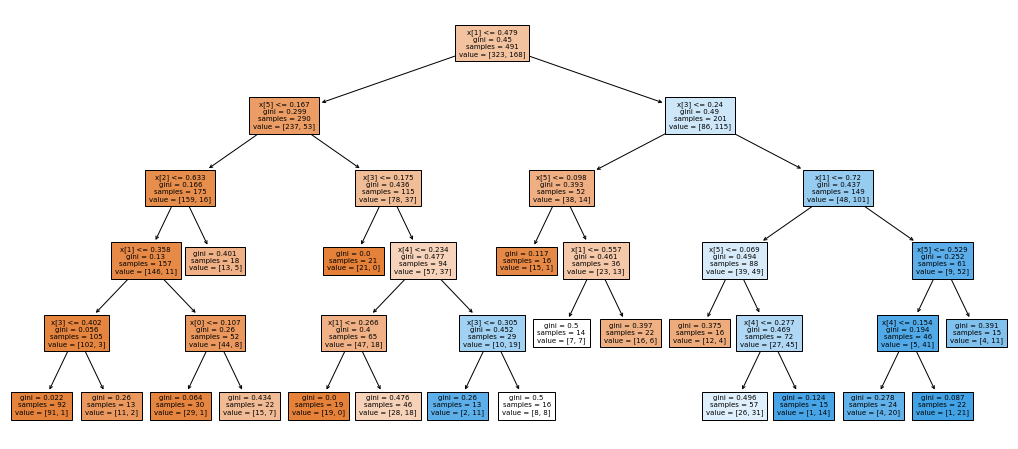

In [32]:
from sklearn import tree

plt.figure(figsize=(18, 8))

tree.plot_tree(classifier, filled=True, fontsize=7)

Dit model, zonder enige hyperparametertuning, is volgens de test 70% accuraat. In de volgende modellen zullen de hyperparameters aangepast worden om te kijken of het model anders presteert. 

# Pruning 

"Pruning" betekent letterlijk vertaald "snoeien". Met de toepassing op decision tree modellen betekent het de beslisboom in te korten, om onnodige takken weg te halen. Hiermee is het bijvoorbeeld mogelijk overfitting the voorkomen door het model meer te laten generaliseren. (Hoare, 2022)

In ons model wordt er ook pruning toegepast. Met de grid search word er bepaald welke diepte de beste resultaten geeft. Door de max_depth op 5 te zetten word in feite het model ingekort, of in de termen van een boom, snoeien we de boom. 

In [12]:
from sklearn.model_selection import cross_val_score, StratifiedKFold



# Het maken van het decision tree model
classifier = DecisionTreeClassifier(max_depth = 5, min_samples_leaf= 13,  random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='accuracy')

# traing accuracy berekenen
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

# traingin en cross val accuracy printen
print("Training Accuracy:", training_accuracy)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cross_val_scores.std())

Training Accuracy: 0.8004073319755601
Cross-Validation Scores: [0.75757576 0.74489796 0.7755102  0.69387755 0.74489796]
Mean Cross-Validation Accuracy: 0.743351886209029
Standard Deviation of Cross-Validation Scores: 0.027162350600397296


In [13]:
y_train_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1.

In [14]:
param_dt = {"criterion":["gini", "entropy"], "max_depth":[5, 10, 20], "min_samples_leaf":[2, 4, 8]}

dt = DecisionTreeClassifier(random_state=42)

gs_dt = GridSearchCV(dt, param_dt, cv=cv, scoring="recall", n_jobs=-1)

gs_dt.fit(X_train, y_train)

gs_dt.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8}

In [15]:
gs_dt.best_score_

0.6253119429590017

In [ ]:
import datetime
def submissie(model, suffix):
    """
    Deze functie maakt de voorspelling op de test dataset
    en vormt deze om tot een csv bestand om in te kunnen
    leveren op Kaggle.

    Parameters:
    ----------
    model : Machine Learning model
        De naam die is gegeven aan het ML-model dat
        wordt gebruikt om te voorspellen

    suffix : str
        De laatste 'tag' voor de naam van het csv
        bestand, zodat deze makkelijk te identificeren
        is na de submission.

    Returns:
    ----------
    None
        In plaats van een return maakt het een bestand
        aan in de map Kaggle Submissions. De namen zien
        er als volgt uit:

    """
    # Fitten, voorspellen en veranderen naar integer
    y_pred = model.fit(X_train, y_train).predict(test_scaled)
    y_pred = y_pred.astype(int)

    # Aanmaken df met alleen p_id en Outcome
    test_predictions_df = pd.DataFrame(
        {'p_id': data_test['p_id'],
        'Outcome': y_pred})
    
    # Aanmaken van tijd
    tijd = datetime.datetime.now().strftime("%m%d%H%M%S")

    # Aanmaken csv bestand met timestamp
    test_predictions_df.to_csv(
        f'Kaggle Submissions/vs_{suffix}_{tijd}.csv',
        index=False)
    
    # print voor conformatie
    print(f'vs_{suffix}_{tijd}.csv has been saved!')

In [ ]:
dt_sub = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=8, random_state=42)

y_pred = dt_sub.fit(X_train, y_train).predict(test_scaled)
y_pred = y_pred.astype(int)
y_pred

In [ ]:
submissie(dt_sub, "dt")

# Gradient boosting

Gradient boosting is een manier van machine learning gebruikt in regressie and classificatieproblemen waarbij meerdere zogenaamde "weak learners", modellen die weinig aannames doen over de data, als een "ensemble" of samenwerking voorspellingen doen over de data. Er zijn meerdere redenen waarom er voor gradient boosting gekozen word in plaats van andere modellen. Omdat er bij gradient boosting gebruik word gemaakt van meerdere modellen die de fouten van vorige modellen corrigeren, kan het accurater zijn. Door het gebruik van weak learners is gradient boosting ook bestendiger teken overfitting.

Er zijn ook een paar nadelen verbonden aan het gebruik van gradient boosting. Het is een stuk complexer dan een standaard model, en deze complexiteit en het gebruik van meerdere bomen zorgt er voor dat de tijd die het kost om het model te maken een stuk langer kan zijn dan een standaard model.

In [ ]:
# importeren
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# aanmaken gradient boosting model
gb = GradientBoostingClassifier(random_state = 42)

In [ ]:
# gebruik van gridsearch om de beste parameters te zoeken
param_gb = {"criterion":["friedman_mse", "squared_error"], "learning_rate":[0.1, 5000, 7500, 8000, 8500], "n_estimators":[1, 3, 5], "max_depth":[2, 3 ,5, 7, 9], "min_samples_leaf":[2, 4, 8, 10]}

gs_gb = GridSearchCV(gb, param_gb, cv=cv, scoring="recall", n_jobs=-1)

gs_gb.fit(X_train, y_train)

gs_gb.best_params_

In [ ]:
# model met beste parameters voor Kaggle submissie
gb_sub = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=8000, max_depth=5, min_samples_leaf=4, n_estimators=1)

y_pred_gb = gb_sub.fit(X_train, y_train).predict(test_scaled)
y_pred_gb = y_pred_gb.astype(int)
y_pred_gb

In [ ]:
#submissie(gb_sub, "gradient_boosting")

In [ ]:
# f1 score, 

bronnen:

Hoare, J. (2022, September 13). Pruning decision trees and machine Learning - Displayr. Displayr. https://www.displayr.com/machine-learning-pruning-decision-trees/

ChatGPT, 2023, prompt 1: Increase Tree Plot size. https://chat.openai.com/share/878ee097-cee4-4ee3-92f9-9d428b617eb9

